In [2]:
# 당뇨병 데이터(load_diabetes())에 대해서 다음을 답하세요.

# 1. Feature별로 target과 단일회귀를 하였을 경우의 결정계수(R Squared)와 MSE 값을 구하세요.[20]

# 2. BMI와 target을 단일회귀를 하고, 산점도와 회귀선을 그리고 이미지를    복사하여 답안지에 붙여 넣으세요.[10]

# 3. 모든 Feature를 독립변수로 가정하고 5가지 이상의 종류를 사용하여 다중회귀를
#    한 후에 회귀기(Regressor) 종류별로 결정계수(R Squared)와 MSE 값을   비교하세요..[20]

In [3]:
import numpy as np
import pandas as pd

> 1. Feature별로 target과 단일회귀를 하였을 경우의 결정계수(R Squared)와 MSE 값을 구하세요.[20]

In [4]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
X = df.iloc[:, :-1].values
y = df.target.values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2023
)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)
pred_lr = linear.predict(X_test)
r2_lr = r2_score(y_test, pred_lr)
mse_lr = mean_squared_error(y_test, pred_lr)

In [8]:
print(f'R squared:{r2_lr:.4f}, MSE: {mse_lr:.4f}')

R squared:0.5474, MSE: 2934.2784


> 2. BMI와 target을 단일회귀를 하고, 산점도와 회귀선을 그리고 이미지를 복사하여 답안지에 붙여 넣으세요.

In [9]:
df2 = df[['bmi','target']]
df2.head()

,bmi,target
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0


In [10]:
X2 = df.bmi.values.reshape(-1,1)
y2 = df.target.values

In [13]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X2,y2)
lr.coef_, lr.intercept_

(array([949.43526038]), 152.13348416289617)

In [14]:
df.bmi.min(), df.bmi.max()

(-0.09027529589850945, 0.17055522598064407)

In [15]:
xs2 = np.array([-0.09, 0.17])
ys2 = np.dot(lr.coef_[0], xs2) + lr.intercept_
ys2

array([ 66.68431073, 313.53747843])

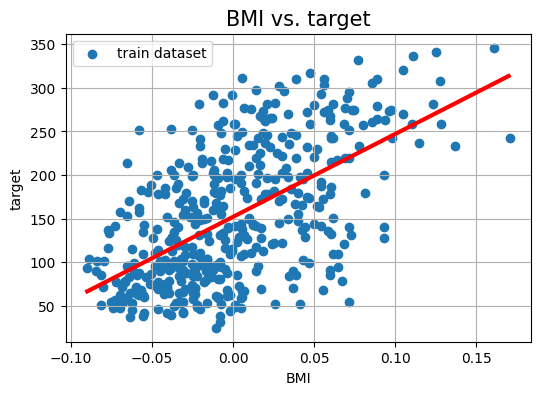

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.scatter(X2, y2,label='train dataset')
plt.plot(xs2, ys2, 'r-', lw=3) # 'r-' 선의 색상을 빨간색('r')으로, 선의 스타일을 실선('-')으로
plt.grid(), plt.legend()
plt.xlabel('BMI'), plt.ylabel('target')
plt.title('BMI vs. target', fontsize=15)
plt.show()

> 3. 모든 Feature를 독립변수로 가정하고 5가지 이상의 종류를 사용하여 다중회귀를
    한 후에 회귀기(Regressor) 종류별로 결정계수(R Squared)와 MSE 값을   비교하세요..[20]

In [17]:
from sklearn.svm import SVR 
svr = SVR()
svr.fit(X_train, y_train)
pred_sv = svr.predict(X_test)
r2_sv = r2_score(y_test, pred_sv)
mse_sv = mean_squared_error(y_test, pred_sv)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2023)
rfr.fit(X_train, y_train)
pred_rf = rfr.predict(X_test)
r2_rf = r2_score(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)

In [19]:
from xgboost import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
pred_xg = xgr.predict(X_test)
r2_xg = r2_score(y_test, pred_xg)
mse_xg = mean_squared_error(y_test, pred_xg)

In [20]:
from sklearn.linear_model import Ridge 
ridge = Ridge(random_state=2023)
ridge.fit(X_train, y_train)
pred_rg = ridge.predict(X_test)
r2_rg = r2_score(y_test, pred_rg)
mse_rg = mean_squared_error(y_test, pred_rg)

In [21]:
from sklearn.linear_model import Lasso 
lasso = Lasso(random_state=2023)
lasso.fit(X_train, y_train)
pred_ls = lasso.predict(X_test)
r2_ls = r2_score(y_test, pred_ls)
mse_ls = mean_squared_error(y_test, pred_ls)

In [24]:
print('\t\tSVR\t\tRF\t\tXGR\t\tRG\t\tLS')
print(f'R squared\t{r2_sv:.4f}\t\t{r2_rf:.4f}\t\t{r2_xg:.4f}\t\t{r2_rg:.4f}\t\t{r2_ls:.4f}')
print(f'MSE\t\t{mse_sv:.4f}\t{mse_rf:.4f}\t{mse_xg:.4f}\t{mse_rg:.4f}\t{mse_ls:.4f}')

		SVR		RF		XGR		RG		LS
R squared	0.1736		0.4374		0.3298		0.4885		0.3414
MSE		5357.8379	3647.4062	4345.2940	3316.0657	4269.5669
